In [119]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [120]:
#https://github.com/fraunhoferhhi/BerlinV2X
sidelink='/home/bde/Data/BerlinV2X/sidelink_dataframe.parquet'
cellular='/home/bde/Data/BerlinV2X/cellular_dataframe.parquet'
df = pd.read_parquet(cellular)
#df.info(verbose=True)

In [121]:
DIRECTION_downlink = True
# "direction == 'downlink'
# "direction == 'uplink'
# measured_qos == 'datarate'
# measured_qos == 'delay'
# Filter only for downlink datarate measurements
filtered_data = df.query("direction == 'downlink' & measured_qos == 'datarate'")

# Remove incomplete measurements without datarate
filtered_data = filtered_data.dropna(subset='datarate')

# Train and test split along operators
operator_1 = filtered_data.query("operator == 1")
operator_1_pc_1 = operator_1.query("device == 'pc1'")
operator_1_pc_2 = operator_1.query("device == 'pc2'")
operator_1_pc_3 = operator_1.query("device == 'pc3'")
operator_1_pc_4 = operator_1.query("device == 'pc4'")

print(len(operator_1_pc_1))
print(len(operator_1_pc_2))
print(len(operator_1_pc_3))
print(len(operator_1_pc_4))

operator_2 = filtered_data.query("operator == 2")
operator_2_pc_1 = operator_2.query("device == 'pc1'")
operator_2_pc_2 = operator_2.query("device == 'pc2'")
operator_2_pc_3 = operator_2.query("device == 'pc3'")
operator_2_pc_4 = operator_2.query("device == 'pc4'")

print(len(operator_2_pc_1))
print(len(operator_2_pc_2))
print(len(operator_2_pc_3))
print(len(operator_2_pc_4))

19564
0
0
9554
0
8779
14776
0


In [143]:
df_new = operator_2_pc_3[['datarate', 'PCell_RSRP_1','PCell_RSRP_2','PCell_RSRQ_1','PCell_RSRQ_2','PCell_RSSI_1','PCell_RSSI_2','PCell_SNR_1','PCell_SNR_2']]
#df_new = operator_2_pc_2[['datarate', 'SCell_RSRP_1','SCell_RSRP_2','SCell_RSRQ_1','SCell_RSRQ_2','SCell_RSSI_1','SCell_RSSI_2','SCell_SNR_1','SCell_SNR_2']]
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14769 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:52:42+02:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datarate      14769 non-null  float64
 1   PCell_RSRP_1  14769 non-null  float64
 2   PCell_RSRP_2  14769 non-null  float64
 3   PCell_RSRQ_1  14769 non-null  float64
 4   PCell_RSRQ_2  14769 non-null  float64
 5   PCell_RSSI_1  14769 non-null  float64
 6   PCell_RSSI_2  14769 non-null  float64
 7   PCell_SNR_1   14769 non-null  float64
 8   PCell_SNR_2   14769 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


<Axes: xlabel='timestamp'>

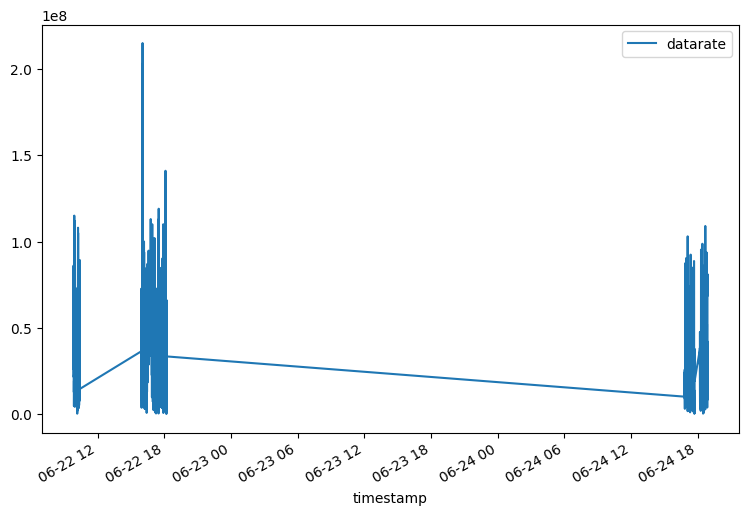

In [144]:
df_new[['datarate']].plot(figsize=(9,6))

In [145]:
df_new['datetime'] = df_new.index

groups=(df_new['datetime'].diff()>pd.Timedelta(seconds=1)).cumsum()+1
max_len = 0
continous_groups = []
for i , group in df_new.groupby(groups):
    if len(group) > 512:
        max_len = len(group)
        continous_groups.append(group)
        print(len(group))
#for group in continous_groups:
    #group.info()

697
696
667
650
678
697
611
691
724
674
692
685
689
678
691
696


<Axes: xlabel='timestamp'>

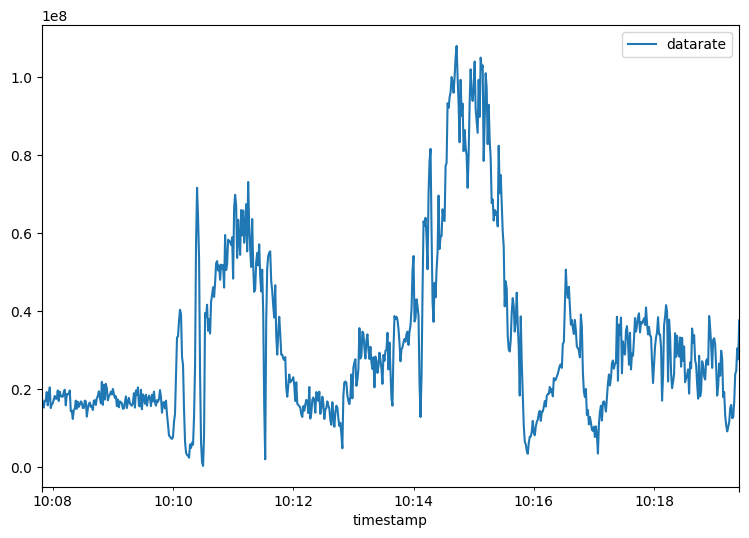

In [146]:
SCOPE = 0
continous_groups[SCOPE][['datarate']].plot(figsize=(9,6))

<Axes: xlabel='timestamp'>

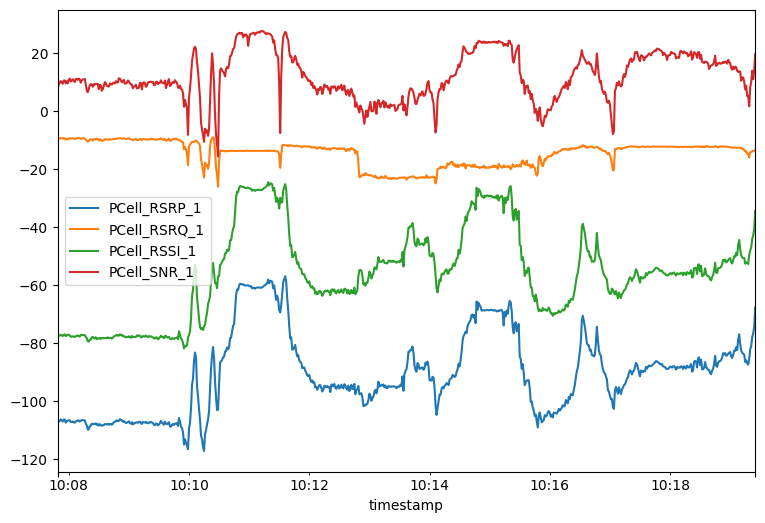

In [147]:
continous_groups[SCOPE][['PCell_RSRP_1', 'PCell_RSRQ_1', 'PCell_RSSI_1', 'PCell_SNR_1']].plot(figsize=(9,6))

In [148]:
""" df = continous_groups[SCOPE]
df['date'] = df['datetime']
df = df.drop(columns=['operator', 'datetime'])
df.to_parquet(f'data/BERLINV2X/continous_groups__{SCOPE}.parquet.gzip',compression='gzip')
df.to_csv(f'data/BERLINV2X/continous_groups_{SCOPE}.csv', encoding='utf-8', index=False)
df.head() """

" df = continous_groups[SCOPE]\ndf['date'] = df['datetime']\ndf = df.drop(columns=['operator', 'datetime'])\ndf.to_parquet(f'data/BERLINV2X/continous_groups__{SCOPE}.parquet.gzip',compression='gzip')\ndf.to_csv(f'data/BERLINV2X/continous_groups_{SCOPE}.csv', encoding='utf-8', index=False)\ndf.head() "

In [149]:
longest = pd.concat(continous_groups)
longest['date'] = longest['datetime']
longest = longest.drop(columns=['datetime'])
longest.to_parquet(f'data/BERLINV2X/consecutive_512_operator_2_pc_3.parquet.gzip',compression='gzip')
longest.to_csv(f'data/BERLINV2X/consecutive_512_operator_2_pc_3.csv', encoding='utf-8', index=False)
longest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10916 entries, 2021-06-22 10:07:49+02:00 to 2021-06-24 18:40:33+02:00
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype                        
---  ------        --------------  -----                        
 0   datarate      10916 non-null  float64                      
 1   PCell_RSRP_1  10916 non-null  float64                      
 2   PCell_RSRP_2  10916 non-null  float64                      
 3   PCell_RSRQ_1  10916 non-null  float64                      
 4   PCell_RSRQ_2  10916 non-null  float64                      
 5   PCell_RSSI_1  10916 non-null  float64                      
 6   PCell_RSSI_2  10916 non-null  float64                      
 7   PCell_SNR_1   10916 non-null  float64                      
 8   PCell_SNR_2   10916 non-null  float64                      
 9   date          10916 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1), float64(9)
memory usag

In [11]:
qos_column = 'datarate'

downlink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Downlink_Num_RBs',
     'PCell_Downlink_TB_Size',
     'PCell_Downlink_Average_MCS',
     'PCell_Downlink_frequency',
     'PCell_Downlink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'SCell_RSRP_max',
     'SCell_RSRQ_max',
     'SCell_RSSI_max',
     'SCell_SNR_1',
     'SCell_SNR_2',
     'SCell_Downlink_Num_RBs',
     'SCell_Downlink_TB_Size',
     'SCell_Downlink_Average_MCS',
     'SCell_Downlink_frequency',
     'SCell_Downlink_bandwidth_MHz',
     'SCell_Cell_Identity',
     'SCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

uplink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Uplink_Num_RBs',
     'PCell_Uplink_TB_Size',
     'PCell_Uplink_Tx_Power_(dBm)',
     'PCell_Uplink_frequency',
     'PCell_Uplink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

print(f"The BERLINV2X uses {len(downlink_columns)} download features and {len(uplink_columns)} upload features")

The BERLINV2X uses 43 download features and 31 upload features


In [12]:
if DIRECTION_downlink:
    # Missing value imputation
    d_1 = train_data_1[downlink_columns].fillna(0)
    d_2 = train_data_4[downlink_columns].fillna(0)
    d_3 = test_data_2[downlink_columns].fillna(0)
    d_4 = test_data_3[downlink_columns].fillna(0)

    downlink = pd.concat([d_1, d_2, d_3, d_4])
    downlink['date'] = downlink.index.tz_localize(None)
    downlink['PCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['PCell_Downlink_bandwidth_MHz'])
    downlink['SCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['SCell_Downlink_bandwidth_MHz'])
    downlink.to_csv(f'data/BERLINV2X/berlin-downlink-delay.csv', encoding='utf-8', index=False)
    downlink.info()
    downlink.head()
    df = downlink

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52673 entries, 2021-06-22 09:49:54+02:00 to 2021-06-24 18:52:46+02:00
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ping_ms                       52673 non-null  float64       
 1   datarate                      52673 non-null  float64       
 2   PCell_RSRP_max                52673 non-null  float64       
 3   PCell_RSRQ_max                52673 non-null  float64       
 4   PCell_RSSI_max                52673 non-null  float64       
 5   PCell_SNR_1                   52673 non-null  float64       
 6   PCell_SNR_2                   52673 non-null  float64       
 7   PCell_Downlink_Num_RBs        52673 non-null  float64       
 8   PCell_Downlink_TB_Size        52673 non-null  float64       
 9   PCell_Downlink_Average_MCS    52673 non-null  float64       
 10  PCell_Downlink_frequency      52673 non-null  f

In [13]:
if not DIRECTION_downlink:
    u_1 = train_data_1[uplink_columns].fillna(0)
    u_2 = train_data_4[uplink_columns].fillna(0)
    u_3 = test_data_2[uplink_columns].fillna(0)
    u_4 = test_data_3[uplink_columns].fillna(0)

    uplink = pd.concat([u_1, u_2, u_3, u_4])
    uplink['date'] = uplink.index.tz_localize(None)
    uplink['PCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['PCell_Uplink_bandwidth_MHz'])
    #uplink['SCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['SCell_Uplink_bandwidth_MHz'])
    uplink.to_csv(f'data/BERLINV2X/berlin-uplink-delay.csv', encoding='utf-8', index=False)
    uplink.info()
    uplink.head()
    df = uplink

In [14]:
df.head()

,ping_ms,datarate,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_1,PCell_SNR_2,PCell_Downlink_Num_RBs,PCell_Downlink_TB_Size,PCell_Downlink_Average_MCS,PCell_Downlink_frequency,PCell_Downlink_bandwidth_MHz,PCell_Cell_Identity,PCell_freq_MHz,SCell_RSRP_max,SCell_RSRQ_max,SCell_RSSI_max,SCell_SNR_1,SCell_SNR_2,SCell_Downlink_Num_RBs,SCell_Downlink_TB_Size,SCell_Downlink_Average_MCS,SCell_Downlink_frequency,SCell_Downlink_bandwidth_MHz,SCell_Cell_Identity,SCell_freq_MHz,Latitude,Longitude,Altitude,speed_kmh,COG,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,date
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-22 09:49:54+02:00,0.0,68700000.0,-76.638750,-14.119375,-45.562500,19.255,22.090,29914.0,4381967.0,26.0,1300.0,20,33802242.0,1800.0,-73.418750,-9.631250,-42.787500,21.968,26.189,46392.0,6111069.0,24.0,3050.0,20,33802248.0,2600.0,52.514013,13.335172,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:54
2021-06-22 09:49:55+02:00,0.0,80300000.0,-77.602500,-14.550000,-45.241250,17.914,22.183,36796.0,5085821.0,25.0,1300.0,20,33802242.0,1800.0,-73.717500,-9.676250,-43.045000,22.368,26.416,48460.0,7083430.0,25.0,3050.0,20,33802248.0,2600.0,52.514012,13.335173,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:55
2021-06-22 09:49:56+02:00,0.0,82600000.0,-77.634375,-14.661875,-45.315625,17.939,22.364,27210.0,3651540.0,24.0,1300.0,20,33802242.0,1800.0,-73.757500,-9.527500,-43.163750,22.495,26.046,43548.0,7045455.0,27.0,3050.0,20,33802248.0,2600.0,52.514010,13.335173,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:56
2021-06-22 09:49:57+02:00,0.0,79600000.0,-76.256875,-14.321250,-45.401875,19.029,22.223,41625.0,6077291.0,26.0,1300.0,20,33802242.0,1800.0,-73.589375,-9.709375,-42.946875,22.936,26.435,48608.0,7226349.0,26.0,3050.0,20,33802248.0,2600.0,52.514007,13.335173,41.9,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:57
2021-06-22 09:49:58+02:00,0.0,95700000.0,-76.021875,-14.018750,-45.606250,19.359,22.872,40278.0,5670015.0,25.0,1300.0,20,33802242.0,1800.0,-73.498125,-9.616875,-42.833125,23.189,26.118,46538.0,6526884.0,25.0,3050.0,20,33802248.0,2600.0,52.514005,13.335173,41.8,0.0,0.0,0.0652,0.04,18.15,18.15,14.06,0.77,1011.9,4.07,0.97,3.0,16.093,3.44075,2021-06-22 09:49:58


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,3, figsize=(20, 6))
#sns.heatmap(df.corr('pearson'), ax=ax[0], annot=True)
#sns.heatmap(df.corr('spearman'), ax=ax[1], annot=True)
#sns.heatmap(df.corr('kendall'), ax=ax[2], annot=True)

In [16]:
def multi_corr(df, feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)
    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

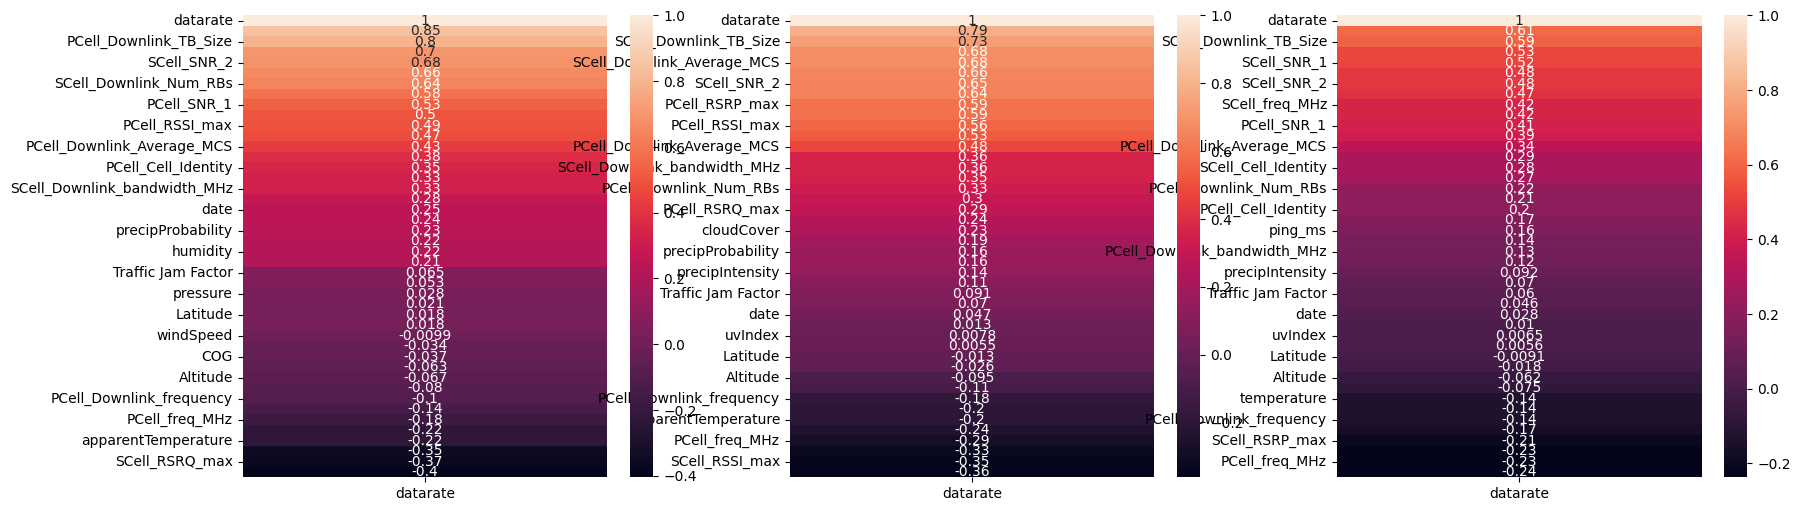

In [17]:
multi_corr(df, 'datarate')

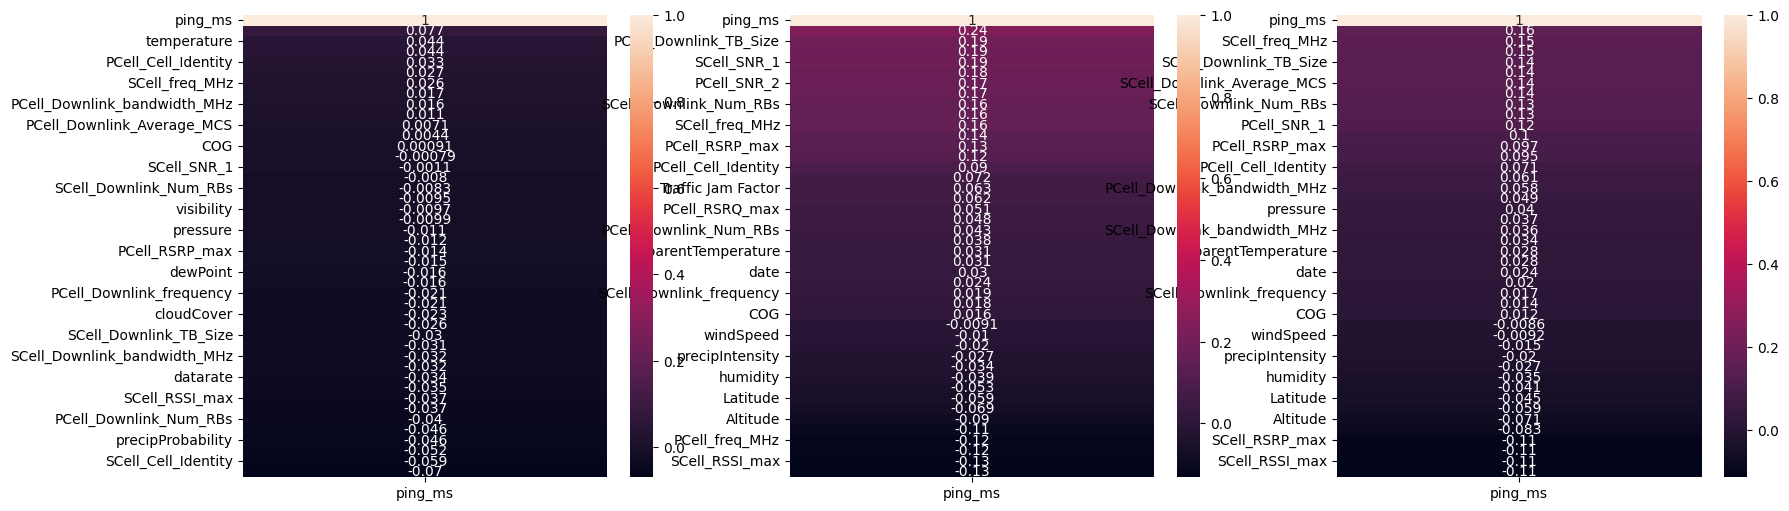

In [18]:
multi_corr(df, 'ping_ms')